In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [23]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/bin-balance-pendulum/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/bin-balance-pendulum/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


ActionsAdvantageMean  ActionsClipFrac  ActionsEntropy  ActionsKL  \
0                 -5.658196              NaN        0.914242   0.004492   
1                  0.249659              NaN        0.944352   0.003235   
2                  0.346175              NaN        0.942653   0.003099   
3                  0.680735              NaN        0.928813   0.004814   
4                  0.563436              NaN        0.933195   0.010661   
5                  0.526061              NaN        0.931270   0.004674   
6                  0.377403              NaN        0.897130   0.007788   
7                  0.679947              NaN        0.884754   0.008067   
8                  0.577808              NaN        0.888201   0.011211   
9                  0.522035              NaN        0.885751   0.009180   
10                 0.607391              NaN        0.861791   0.008985   
11                 0.532282              NaN        0.875230   0.004983   
12                 0.594015              NaN        0.879943   0.010364   
13                 0.607134              NaN        0.885583   0.009280   
14                 0.494947              NaN        0.871804   0.011079   
15                 0.602298              NaN        0.829877   0.007872   
16                 0.533078              NaN        0.799063   0.011131   
17                 0.599137              NaN        0.749567   0.012483   
18                 0.524604              NaN        0.771438   0.004881   
19                 0.645016              NaN        0.761952   0.005730   
20                 0.459248              NaN        0.752238   0.007398   
21                 0.630063              NaN        0.744365   0.006978   
22                 0.571238              NaN        0.742134   0.006639   
23                 0.580509              NaN        0.734044   0.011435   
24                 0.511237              NaN        0.755067   0.010866   
25                 0.624990              NaN        0.733441   0.009436   
26                 0.471358              NaN        0.730795   0.008446   
27                 0.657295              NaN        0.727283   0.010289   
28                 0.368073              NaN        0.688332   0.005638   
29                 0.460150              NaN        0.717094   0.007392   
...                     ...              ...             ...        ...   
15370             -0.582507              NaN       -1.542658   0.011594   
15371             -0.211711              NaN       -1.559108   0.017976   
15372              0.536331              NaN       -1.564265   0.006324   
15373              0.307993              NaN       -1.566826   0.017012   
15374             -1.061211              NaN       -1.590460   0.006514   
15375             -1.284077              NaN       -1.588757   0.012907   
15376              3.226231              NaN       -1.601445   0.017031   
15377              1.291555              NaN       -1.564642   0.010792   
15378             -1.118016              NaN       -1.601922   0.013612   
15379              1.432137              NaN       -1.563116   0.026709   
15380              0.024408              NaN       -1.573705   0.012776   
15381              1.719333              NaN       -1.569442   0.000245   
15382              0.828525              NaN       -1.614150   0.017071   
15383              2.128457              NaN       -1.602104   0.004540   
15384             -0.077832              NaN       -1.594850   0.016604   
15385             -0.916695              NaN       -1.633728   0.015458   
15386             -0.039062              NaN       -1.598341   0.009262   
15387              0.943956              NaN       -1.579041   0.017202   
15388             -0.597961              NaN       -1.571698   0.006842   
15389              0.383338              NaN       -1.565319   0.012309   
15390              1.456403              NaN       -1.599402   0.019515   
15391             -0.593869     

In [24]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

exp_name  steps_per_epoch
0               bin-goal-entropy_pendulum-v0             4800
10      entropy-goals-actions-05_pendulum-v0             4800
17       bin-inv_balance_no_step_pendulum-v0             4800
27          bin-inv_balance_step_pendulum-v0             4800
37  bin-inv_balance_no_step-2400_pendulum-v0             2400
47     bin-inv_balance_step-2400_pendulum-v0             2400

/Users/ppiech/openaigym/spinningup/spinup/utils/plot.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat(data, ignore_index=True)


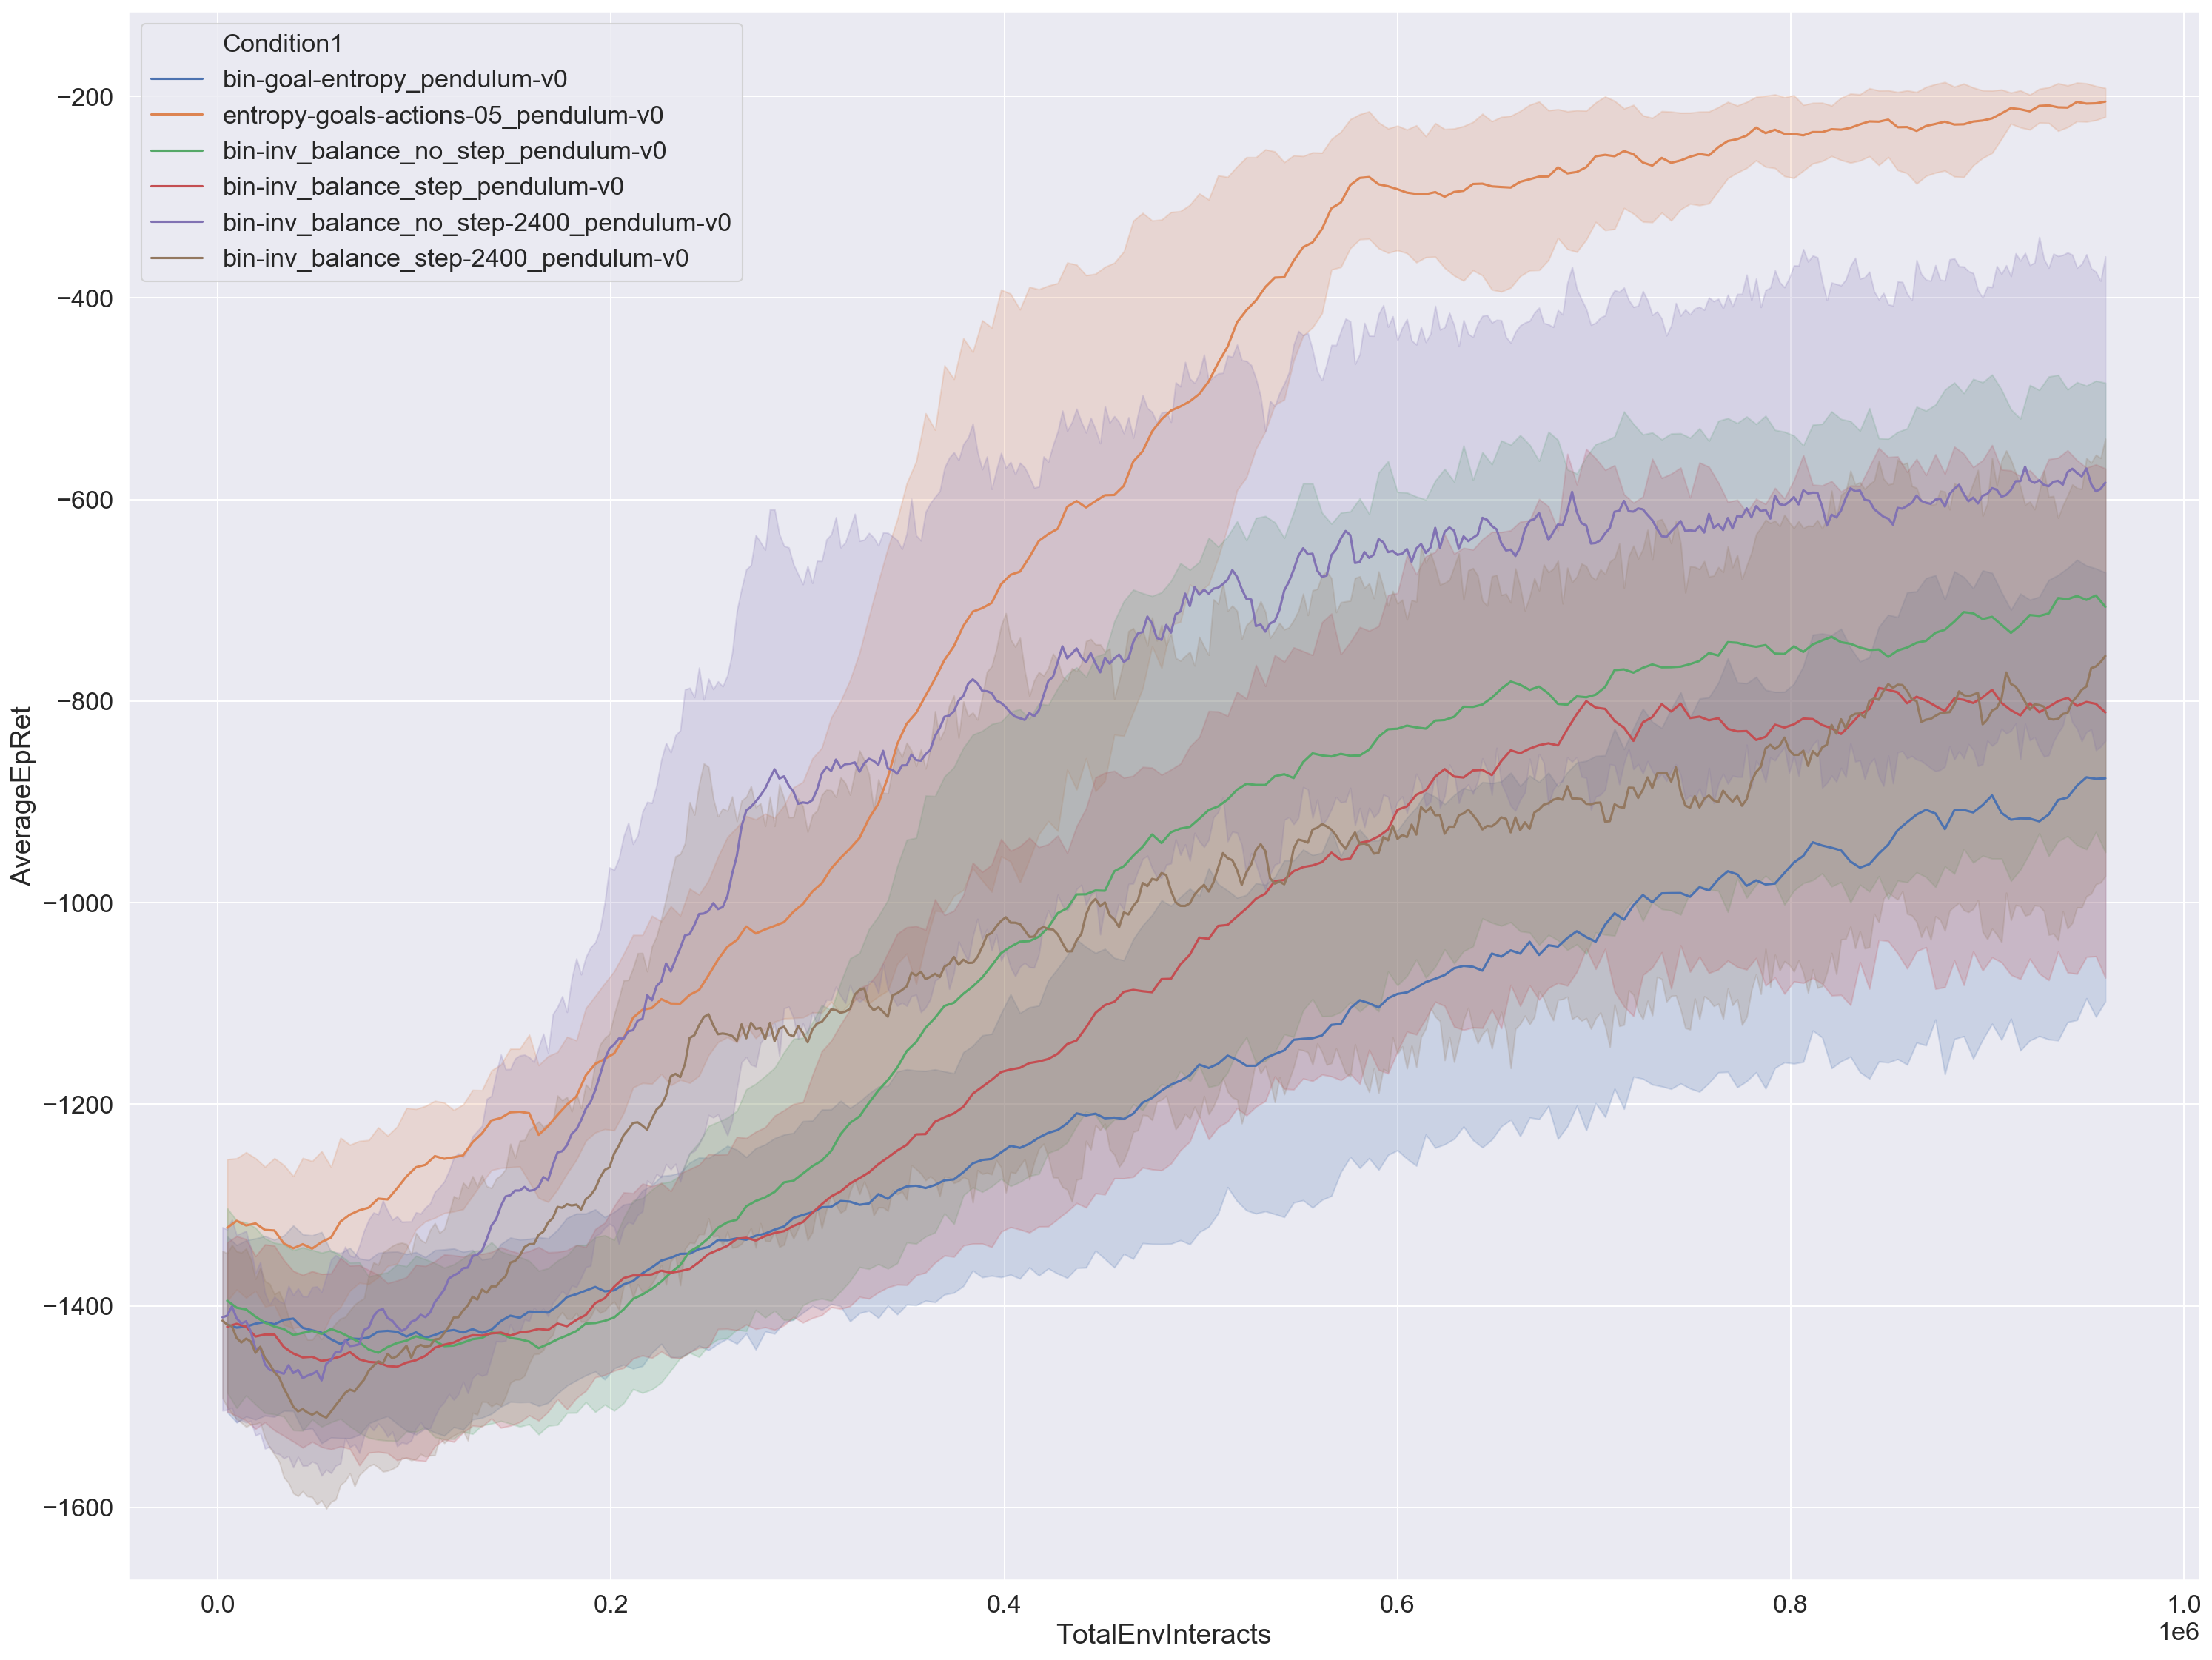

In [25]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

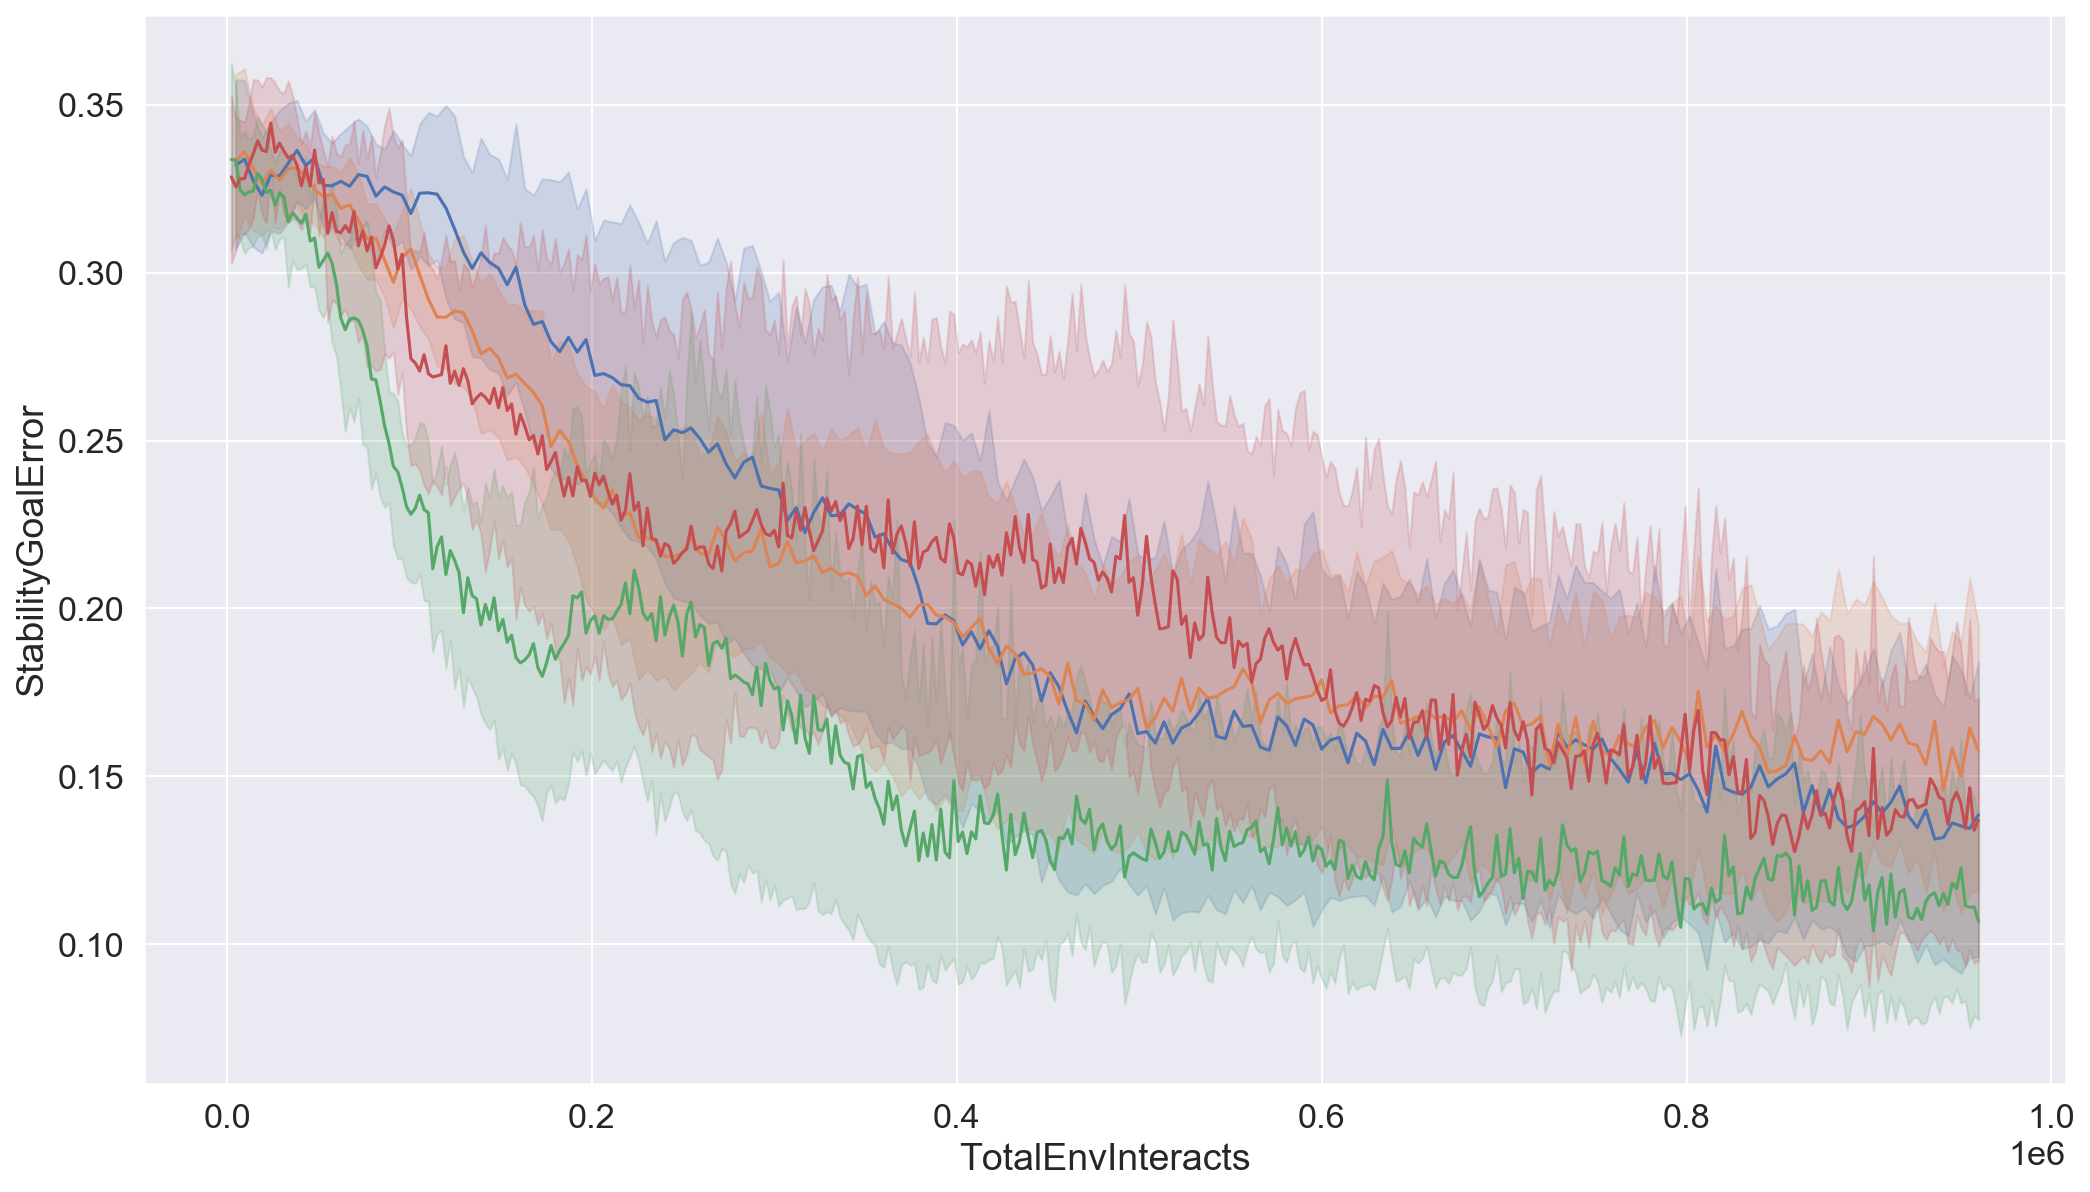

In [16]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean', xaxis='TotalEnvInteracts')
plt.show()

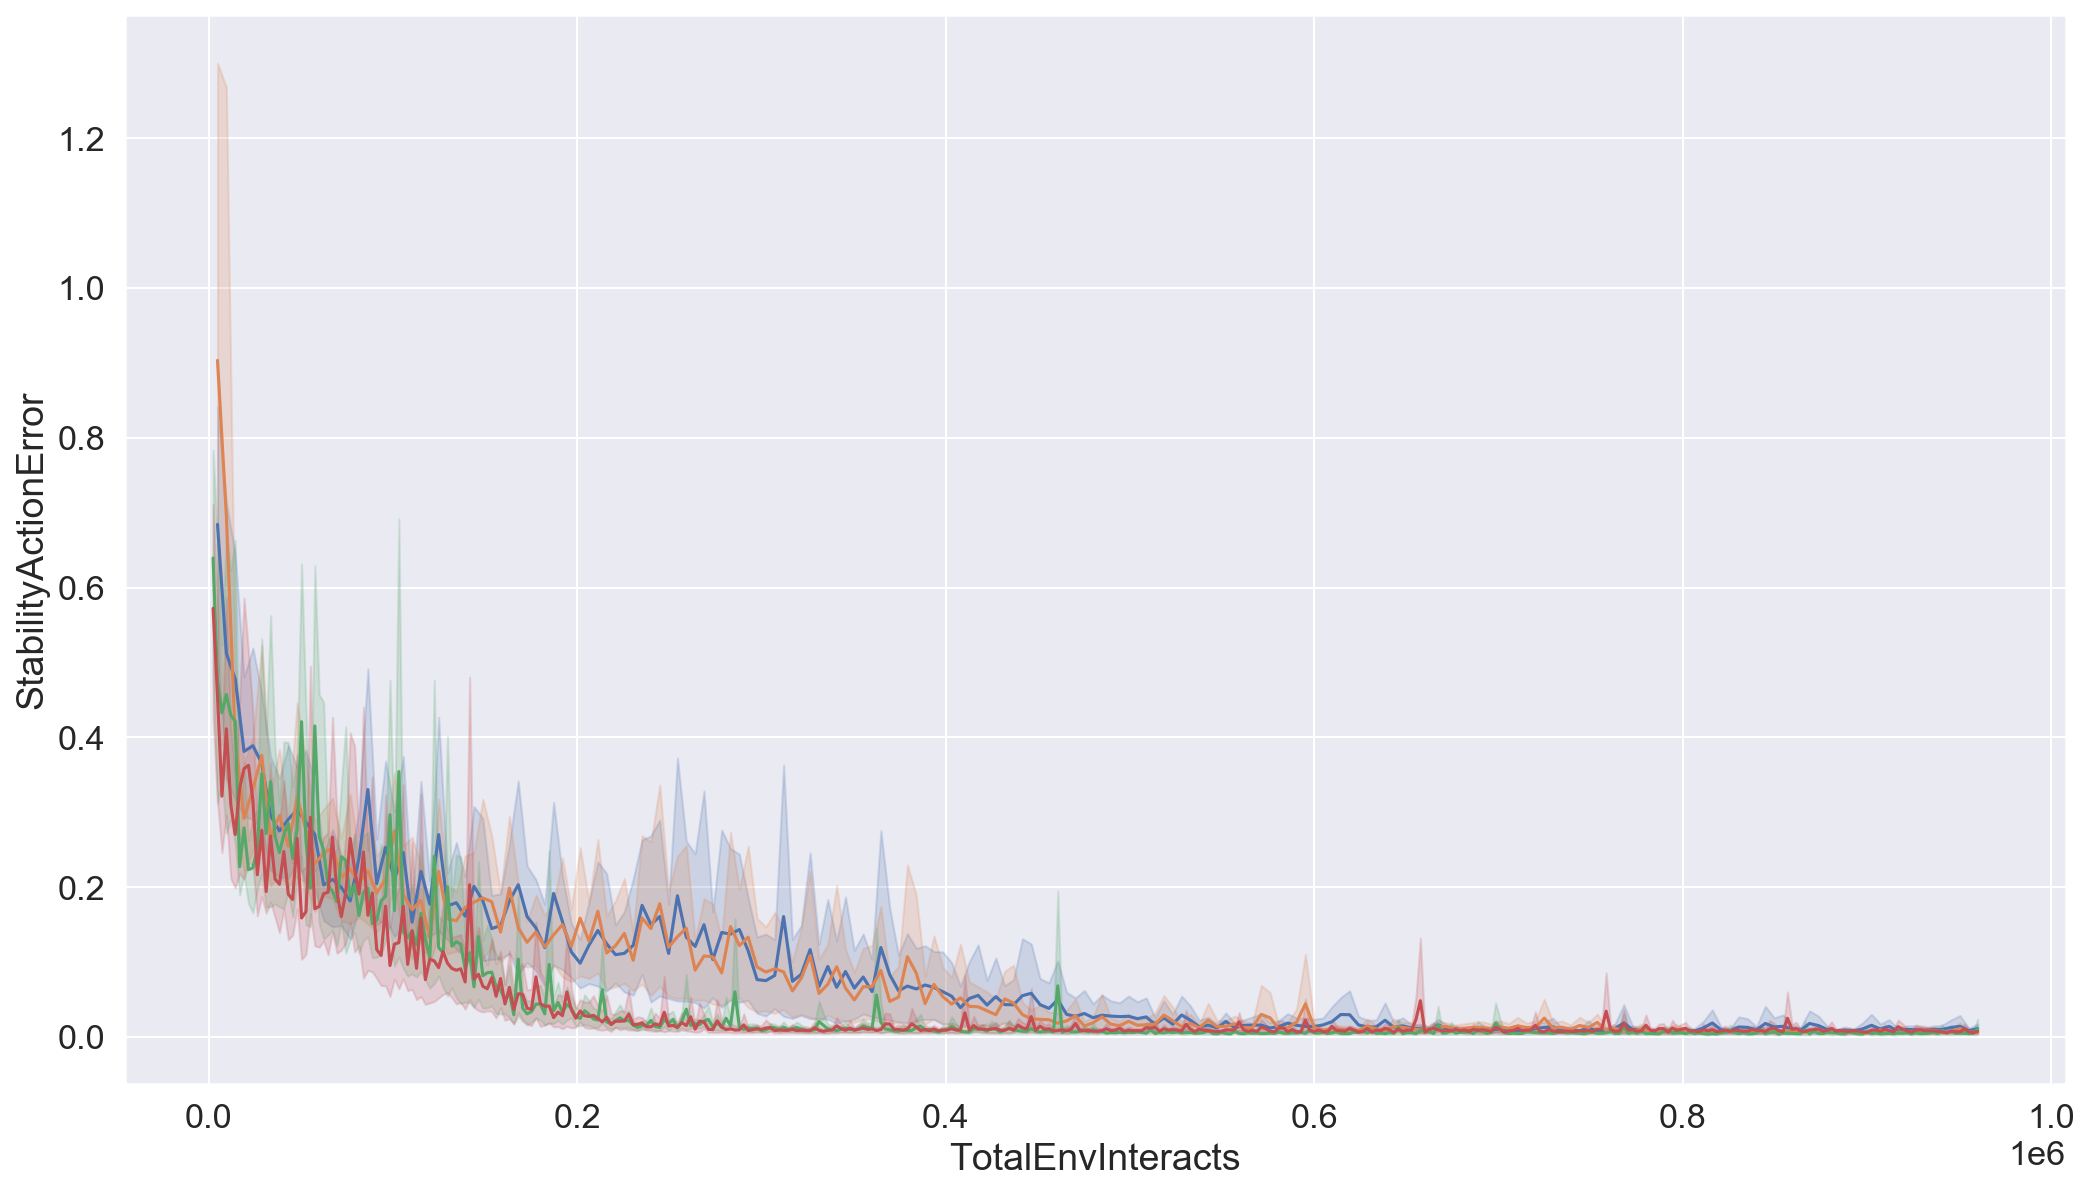

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False, xaxis='TotalEnvInteracts')
plt.show()

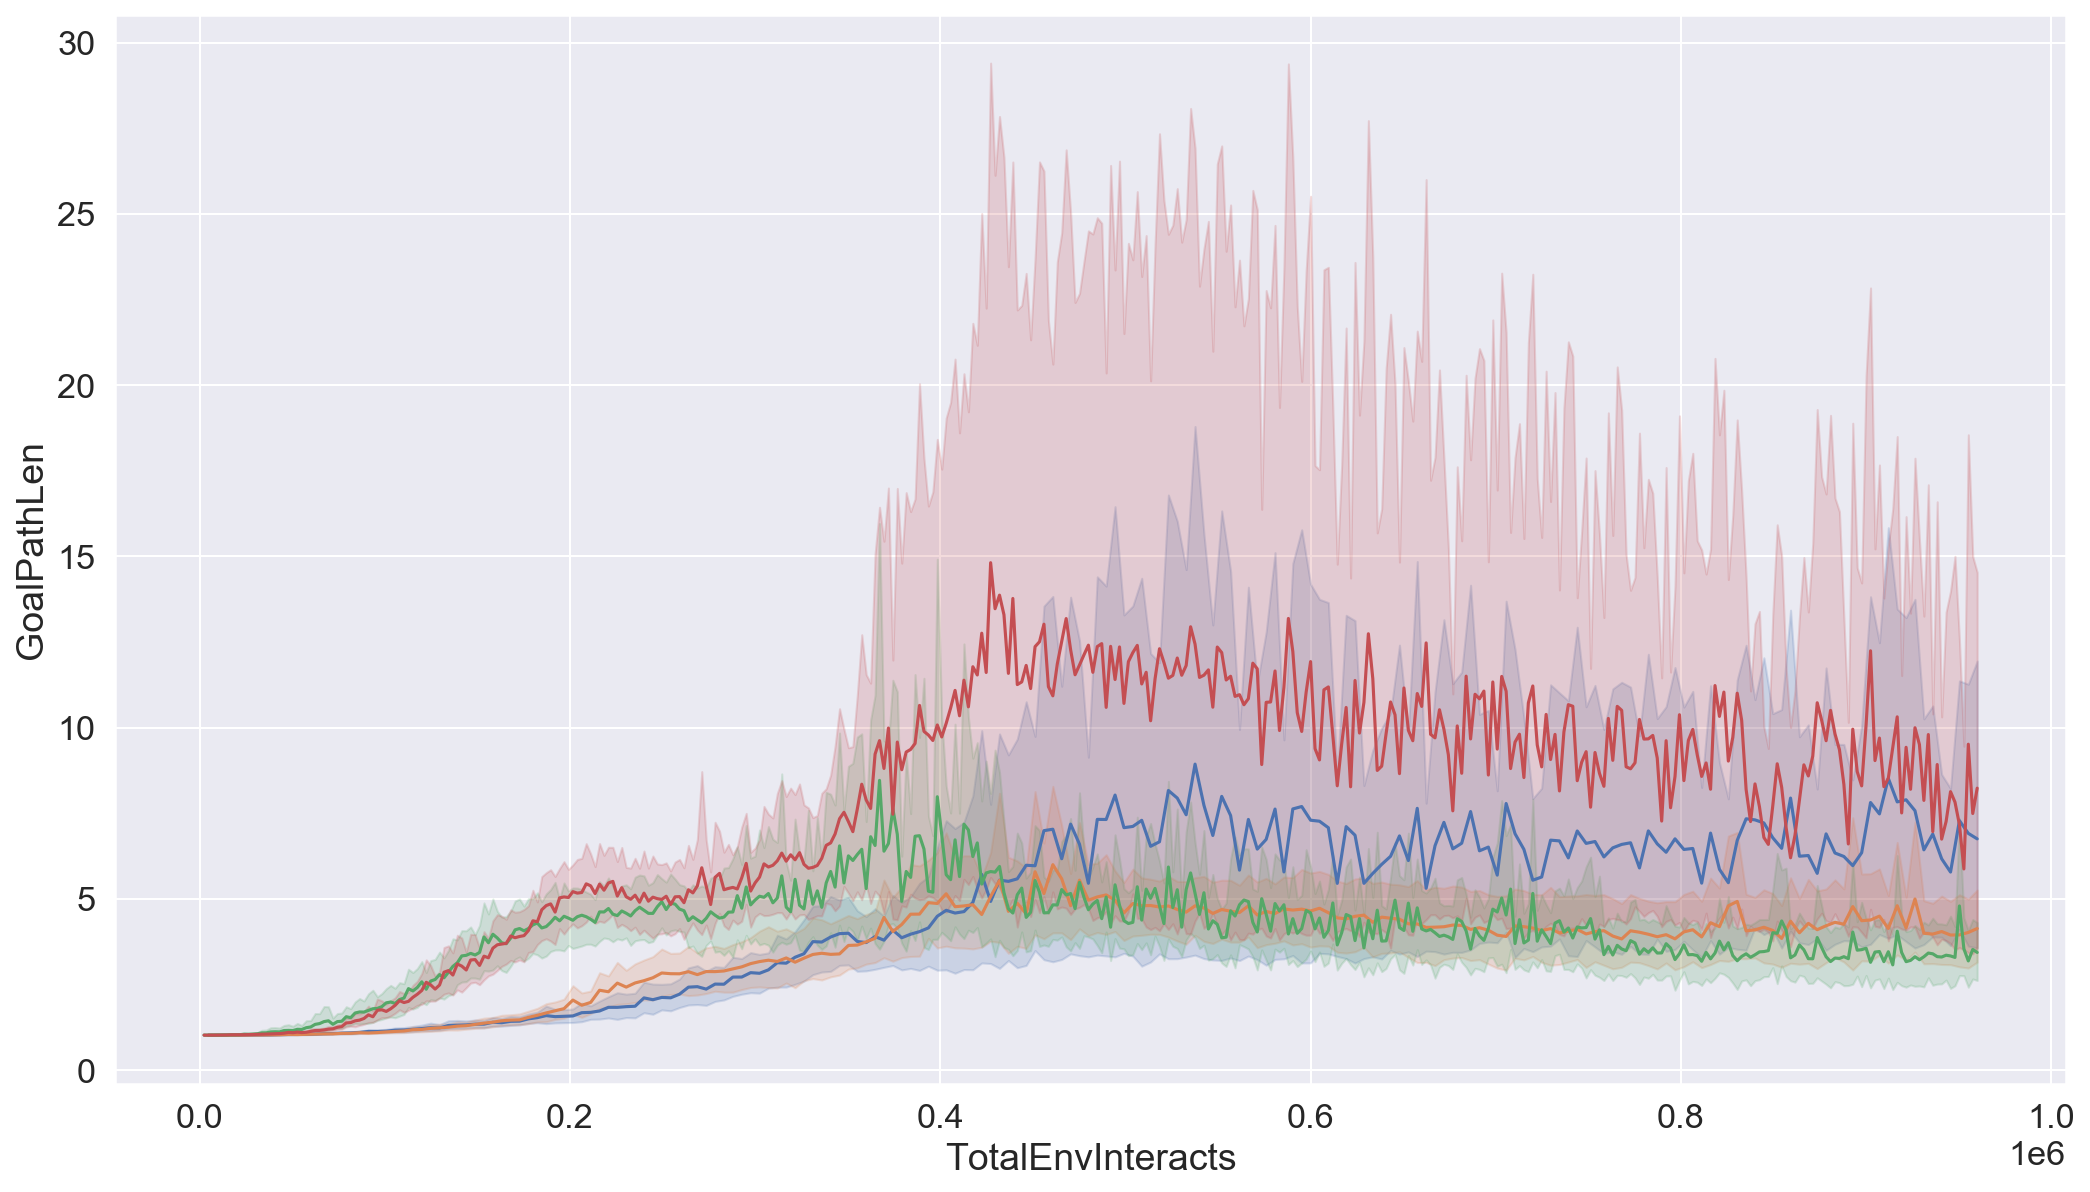

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False, xaxis='TotalEnvInteracts')
plt.show()

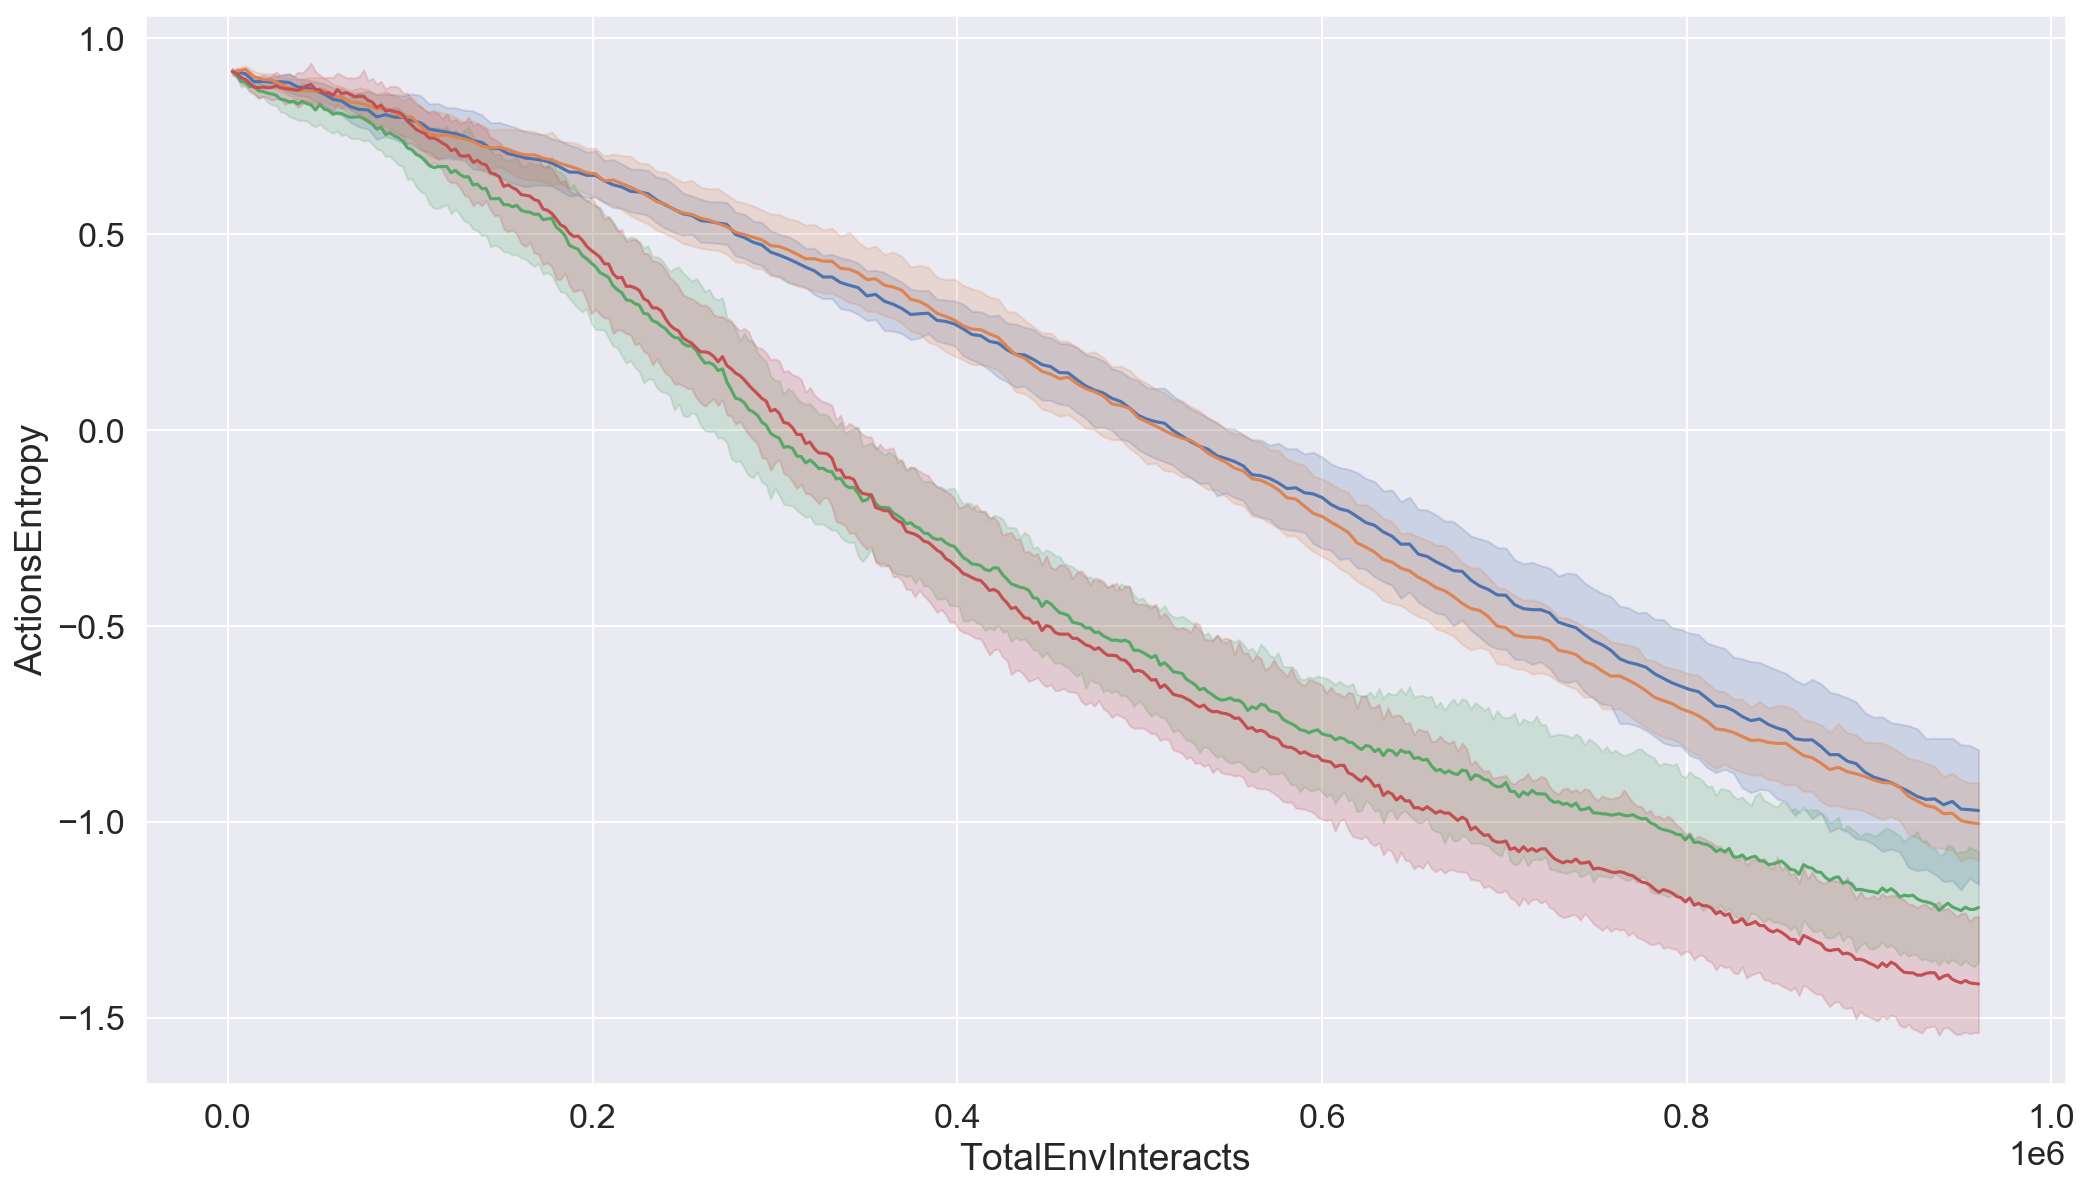

In [19]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False, xaxis='TotalEnvInteracts')
plt.show()

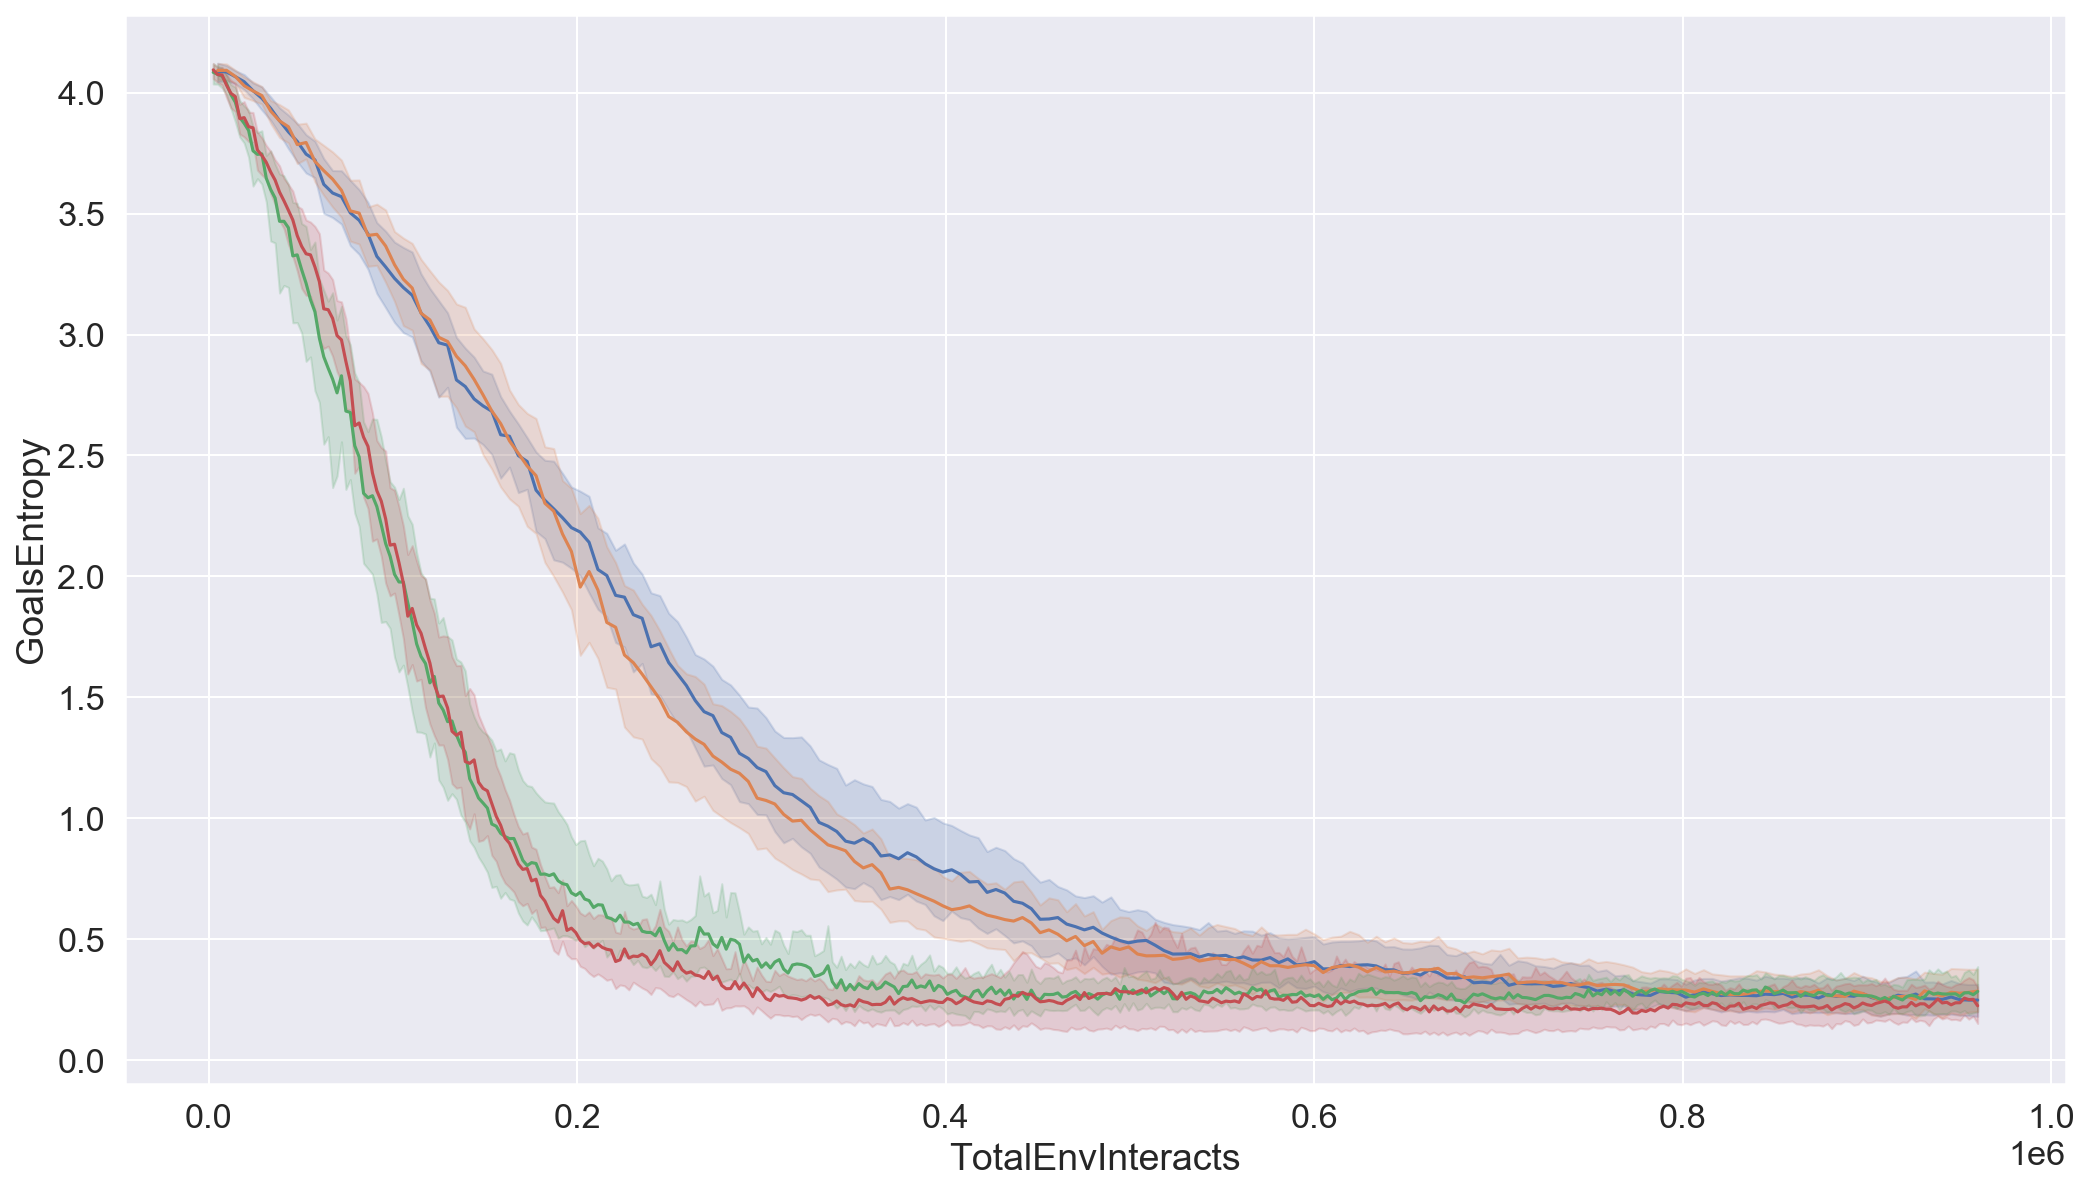

In [20]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False, xaxis='TotalEnvInteracts')
plt.show()

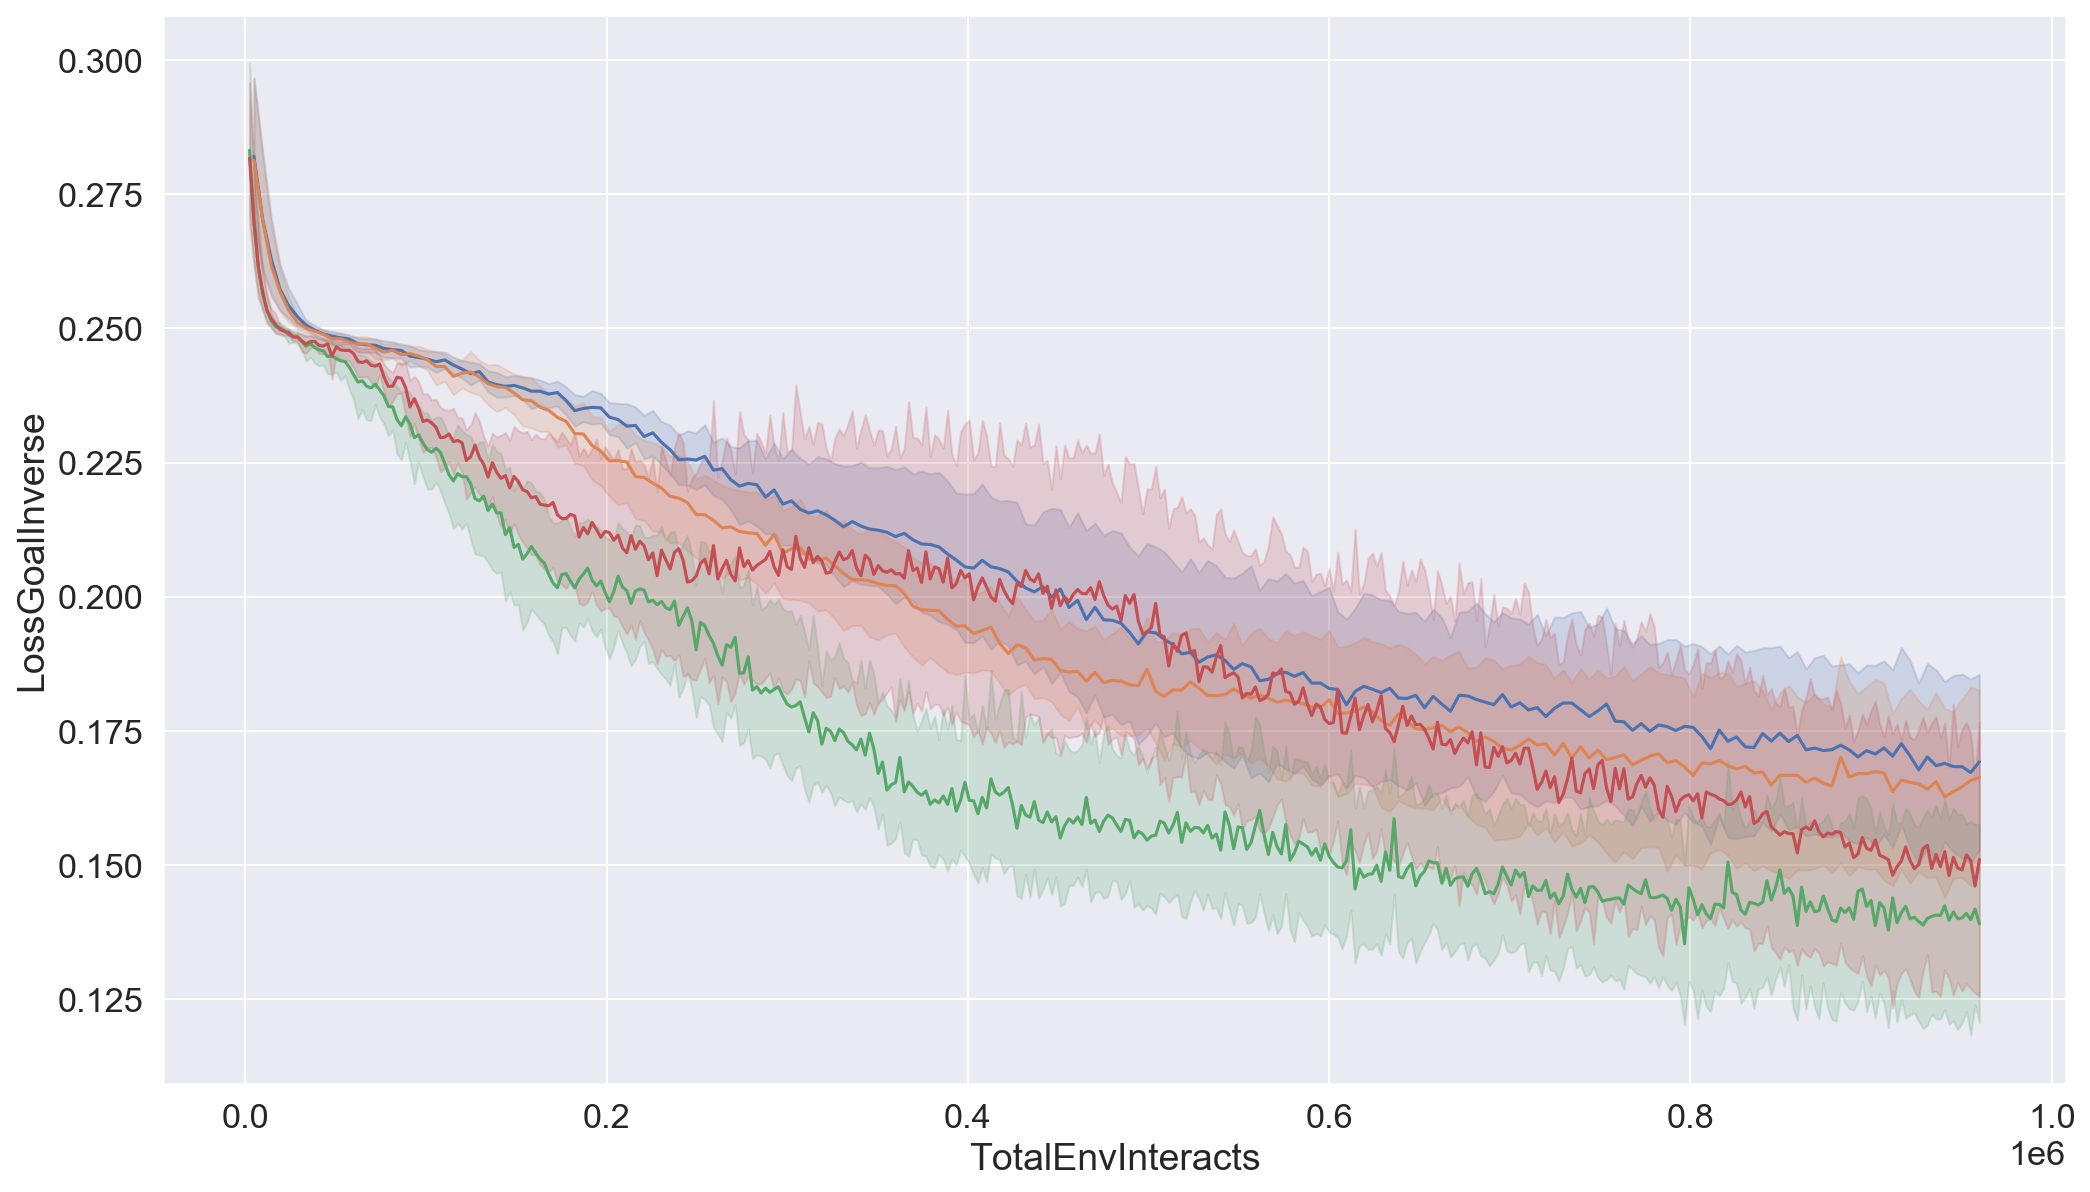

In [21]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='LossGoalInverse', smooth=1, show_legend=False, xaxis='TotalEnvInteracts')
plt.show()